# Analytics test
## The various steps performed on this data before the fitting of data is done.

* Univariate analysis
* NAN identification
* Variance observation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


In [2]:
features = pd.read_csv('machine.csv')
features.head(10)

,Machine_speed,Machine_state,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
0,46.973335,0,2.499970,2.066773,54.559528,949946.0000,2.991859,98.685355,10730.5,1.525074,56.871289,2.157189
1,46.973335,0,2.497196,2.101614,54.962861,949984.6667,2.992938,98.727884,10731.0,1.508612,56.878337,2.152422
2,46.973335,0,2.499792,2.113061,54.796452,950017.6667,2.996020,98.700322,10732.0,1.514143,56.905778,2.108552
3,46.973335,0,2.499559,2.129736,54.731283,950052.8000,2.996281,98.639509,10732.4,1.488390,56.968360,2.086052
4,46.973335,0,2.500058,2.093854,54.844514,950088.5000,2.988235,98.521231,10733.0,1.509662,57.011485,2.090726
5,46.973335,0,2.501300,2.134929,54.719098,950120.0000,2.991909,98.391523,10734.0,1.516884,57.065533,2.095202
6,46.973335,0,2.500378,2.082958,54.993215,950159.4000,2.999112,98.262201,10734.4,1.492385,57.116243,2.094006
7,46.973335,0,2.499837,1.839825,54.788962,950182.0000,2.992971,98.198697,10735.0,1.505333,57.246765,2.104141
8,46.973335,0,2.499646,1.957902,55.084868,950223.0000,2.998823,98.072553,10736.0,1.511921,57.205077,2.110120
9,46.973335,0,2.498415,2.121513,55.056075,950257.8333,2.989491,97.944455,10736.5,1.476032,57.245964,2.104826


In [3]:
y = features.Machine_state
x = features.drop(['Machine_state','Machine_speed'],axis = 1)

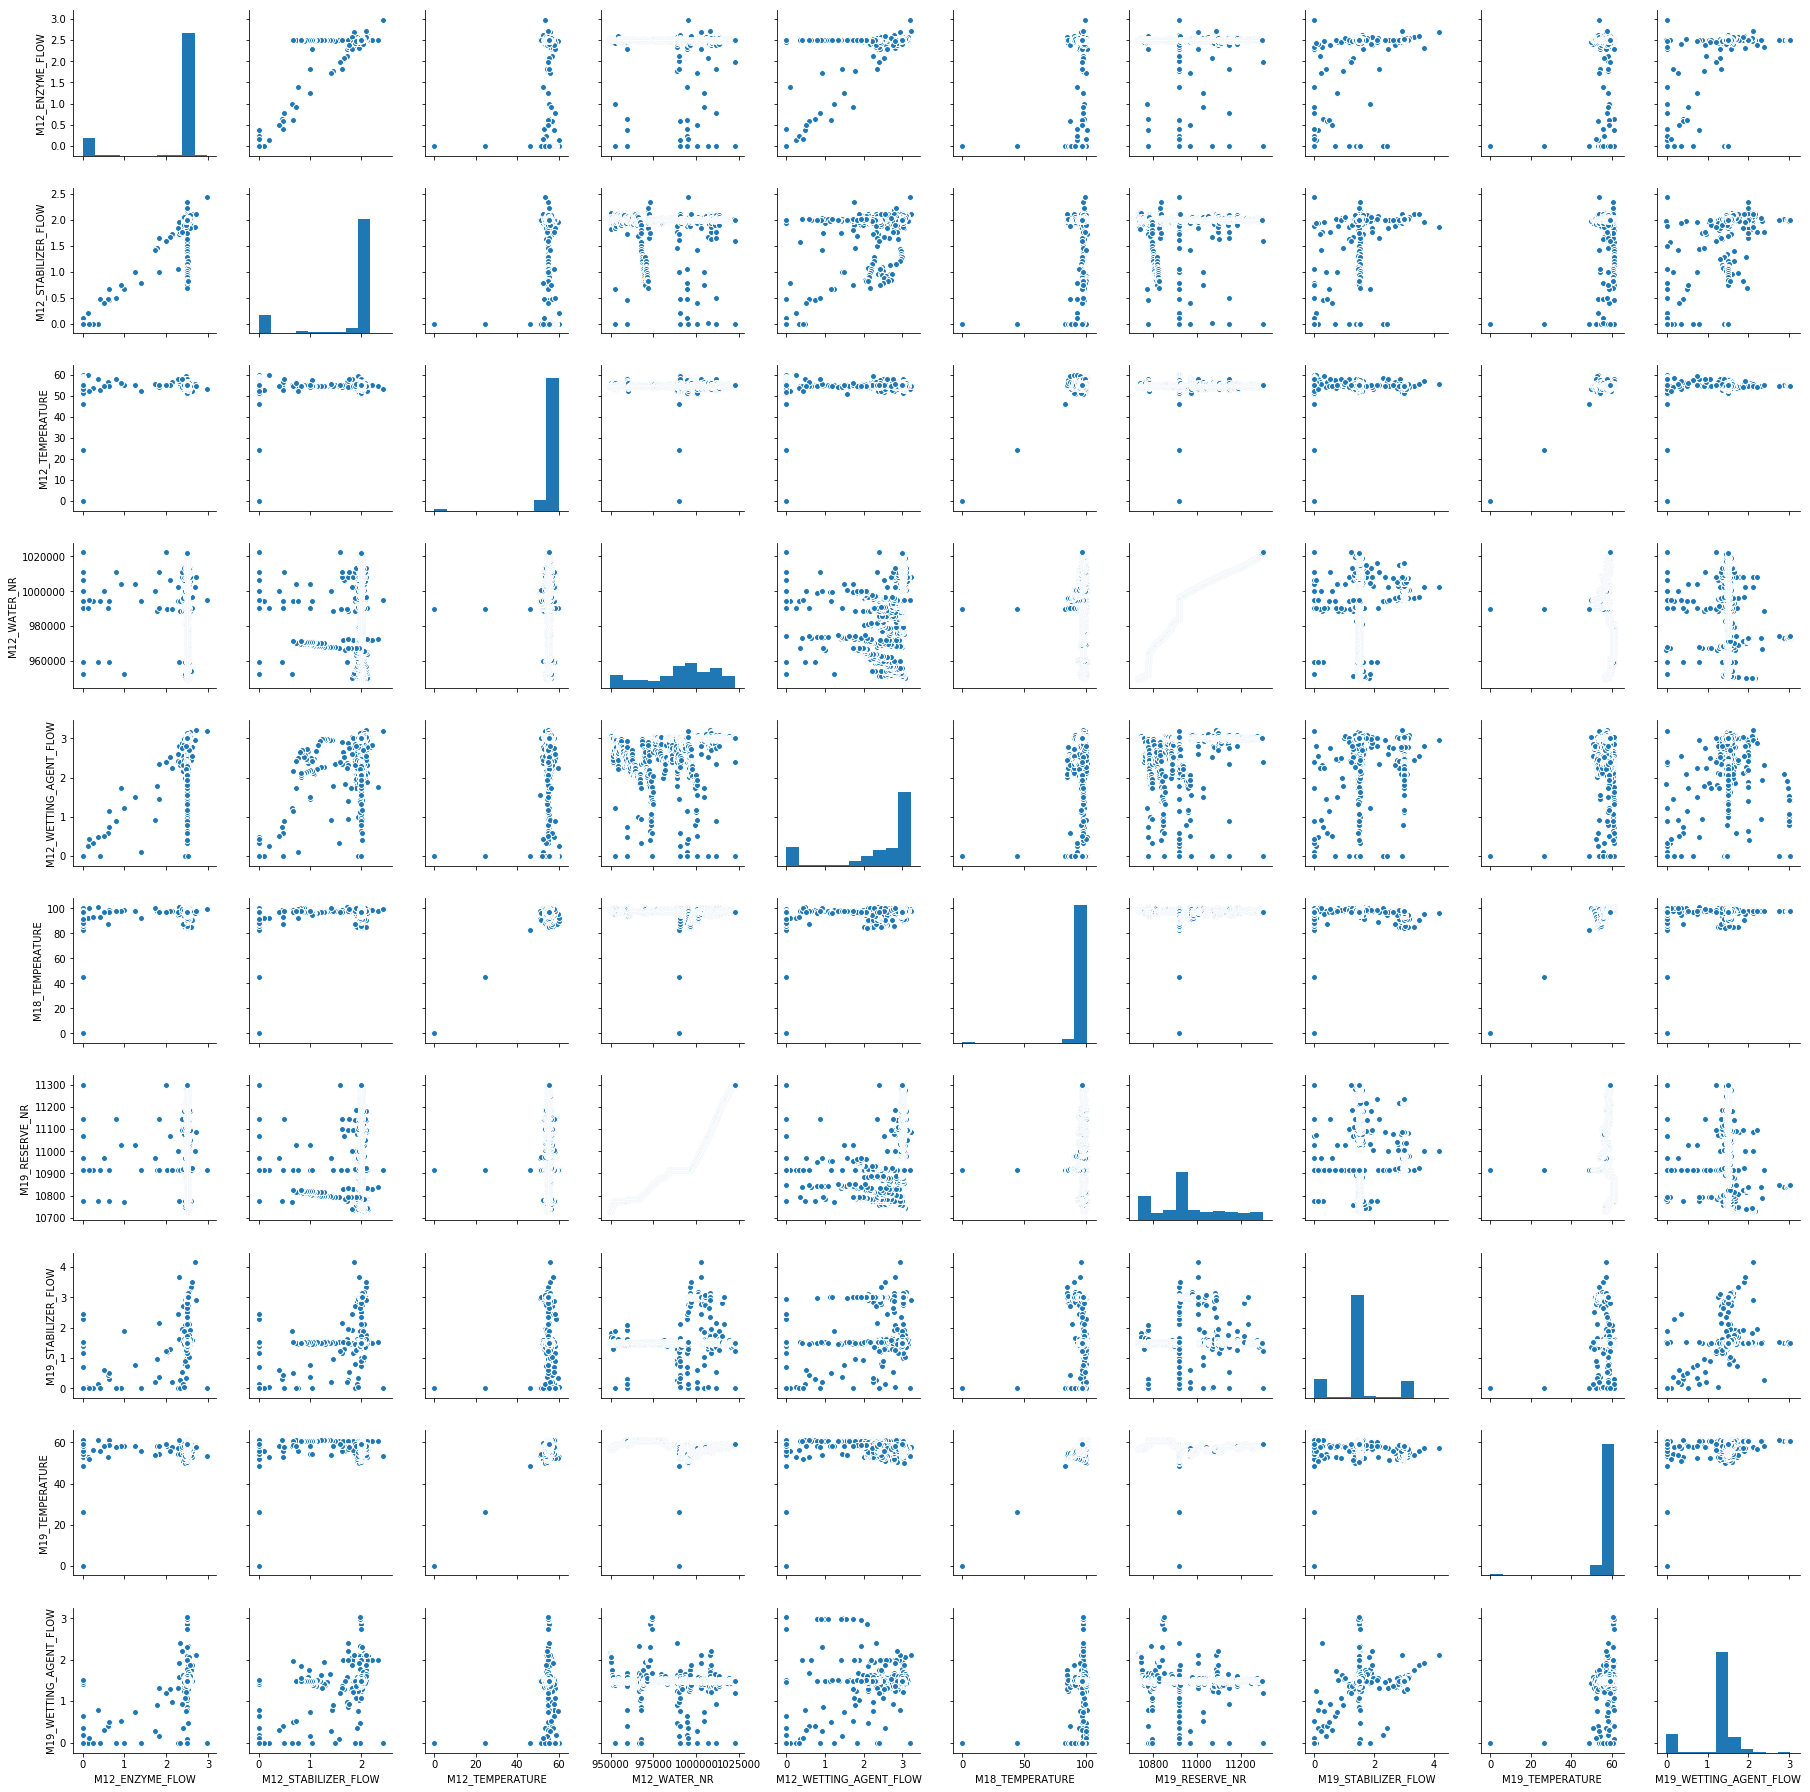

In [21]:
sns.pairplot(x)

### The function below performs the univariate analysis on data

In [4]:
def deep_describe(data):
    cmsq = data.describe()
    
    mode = data.mode(axis = 0,numeric_only=True)
    mode = mode.dropna(axis = 0,how='any')
    mode = mode.set_index([['mode']])
    
    median = pd.DataFrame(data.median()).transpose()
    median = median.set_index([['median']])
    
    variance = pd.DataFrame(x.var(0)).T
    variance = variance.set_index([['variance']])
    
    kurtosis = pd.DataFrame(data.kurtosis()).transpose()
    kurtosis = kurtosis.set_index([['kurtosis']])
    
    skew = pd.DataFrame(data.skew()).transpose()
    skew = skew.set_index([['skewness']])
    
    tr = [cmsq,variance,mode,median,skew,kurtosis]
    return pd.concat(tr)

In [5]:
deep_describe(x)

,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
count,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2988.000000,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2988.000000
mean,2.170996e+00,1.705574e+00,5.451328e+01,9.902124e+05,2.374626,9.629589e+01,10958.558846,1.494842,5.747148e+01,1.324780
std,8.353066e-01,6.796562e-01,5.262175e+00,1.965182e+04,1.000699,9.441423e+00,147.473730,0.767476,5.761615e+00,0.545401
min,-8.560000e-07,-7.570000e-07,1.370000e-38,9.499460e+05,-0.000002,2.460000e-38,10730.500000,-0.000003,1.450000e-38,-0.018309
25%,2.491944e+00,1.974200e+00,5.473029e+01,9.776498e+05,2.249223,9.673316e+01,10872.000000,1.478241,5.712369e+01,1.489610
50%,2.498786e+00,1.997653e+00,5.499982e+01,9.937956e+05,2.936472,9.786367e+01,10916.000000,1.504285,5.820497e+01,1.499058
75%,2.502232e+00,2.003798e+00,5.525958e+01,1.006039e+06,2.999094,9.837613e+01,11059.000000,1.521707,5.880156e+01,1.502098
max,2.972470e+00,2.425751e+00,6.011282e+01,1.022285e+06,3.215173,1.007535e+02,11300.000000,4.151384,6.130416e+01,3.031350
variance,6.977371e-01,4.619326e-01,2.769049e+01,3.861939e+08,1.001398,8.914047e+01,21748.501079,0.589019,3.319621e+01,0.297462
mode,0.000000e+00,0.000000e+00,1.370000e-38,9.945230e+05,0.000000,2.460000e-38,10916.000000,0.000000,1.450000e-38,0.000000


### Null value analysis

In [6]:
total = x.isnull().sum()
percent1 = x.isnull().sum()*100/x.isnull().count()
percent = (round(percent1,1))
missing_data = pd.concat([total,percent],axis = 1,keys = ['total_null','percent_null']).transpose()
missing_data

,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
total_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### The variance in the above data is not to required scale so the scaling is done.

## Splitting the data
Splitting of the data for testing and training of model in ratio 7:3

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Scaling of data Due to irregular variances

In [8]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),index=x_train.index.values, columns=x_train.columns.values)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index.values, columns=x_test.columns.values)

c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


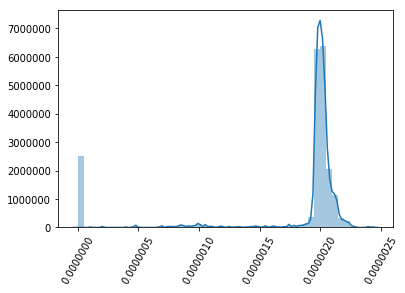

In [9]:
#sns.distplot(x_train_scaled['Machine_speed'])

from sklearn.preprocessing import Normalizer

normal = Normalizer().fit(x_train)
x_train_normalized = pd.DataFrame(normal.transform(x_train),index=x_train.index.values, columns=x_train.columns.values)
df = pd.DataFrame(x_train_normalized['M12_STABILIZER_FLOW'])
g = sns.distplot(df)
for tick in g.get_xticklabels():
    tick.set_rotation(60)

#### Principal component analysis (PCA).
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [10]:
pca = PCA()
pca.fit(x_train)
cpts = pd.DataFrame(pca.transform(x_train))
x_axis = np.arange(1, pca.n_components_+1)


pca_scaled = PCA()
pca_scaled.fit(x_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(x_train_scaled))

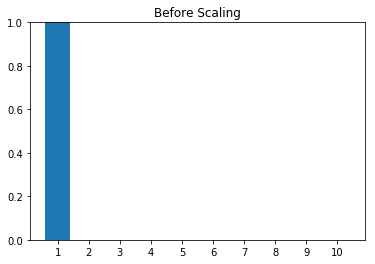

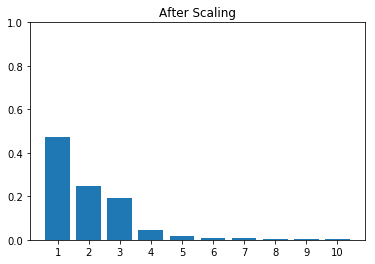

,0
0,M12_ENZYME_FLOW
1,M12_STABILIZER_FLOW
2,M12_TEMPERATURE
3,M12_WATER_NR
4,M12_WETTING_AGENT_FLOW
5,M18_TEMPERATURE
6,M19_RESERVE_NR
7,M19_STABILIZER_FLOW
8,M19_TEMPERATURE
9,M19_WETTING_AGENT_FLOW


In [11]:
plt.bar(x_axis,pca.explained_variance_ratio_)
plt.xticks(x_axis,x_axis)
plt.ylim(0,1)
plt.title('Before Scaling')
plt.show()

plt.bar(x_axis,pca_scaled.explained_variance_ratio_)
plt.xticks(x_axis,x_axis)
plt.ylim(0,1)
plt.title('After Scaling')
plt.show()

pd.DataFrame(x_train.columns)

## REGRESSION BEFORE SCALING

Area under ROC Curve:  0.5
     0  1
0  759  0
1  138  0
                        coefficients
M12_ENZYME_FLOW            -0.000283
M12_STABILIZER_FLOW        -0.000225
M12_TEMPERATURE            -0.000387
M12_WATER_NR                0.000091
M12_WETTING_AGENT_FLOW     -0.000312
M18_TEMPERATURE            -0.000899
M19_RESERVE_NR             -0.008384
M19_STABILIZER_FLOW        -0.000201
M19_TEMPERATURE            -0.000618
M19_WETTING_AGENT_FLOW     -0.000176


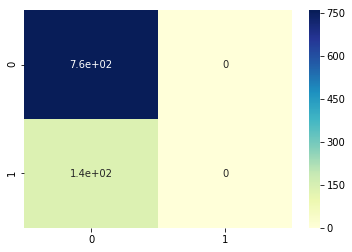

In [12]:
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)
pred = logit.predict(x_test)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
cm = pd.DataFrame(confusion_matrix(y_test,pred))
print(cm)
sns.heatmap(cm,annot = True,cmap="YlGnBu")
print(pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T)

fpr_unsc, tpr_unsc, _ = roc_curve(y_test,pred) 

## Regression after scaling

Area under ROC Curve:  0.9393939393939393
                        coefficients
M12_ENZYME_FLOW            -0.175581
M12_STABILIZER_FLOW        -0.821397
M12_TEMPERATURE             0.521100
M12_WATER_NR                0.659185
M12_WETTING_AGENT_FLOW     -0.629057
M18_TEMPERATURE             0.255227
M19_RESERVE_NR             -0.161048
M19_STABILIZER_FLOW        -0.502695
M19_TEMPERATURE            -1.011381
M19_WETTING_AGENT_FLOW     -0.910921
<class 'numpy.ndarray'>


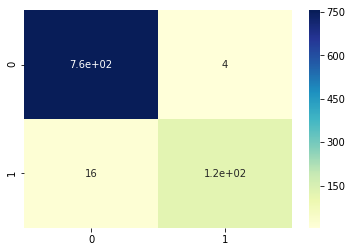

In [13]:
logit = LogisticRegression()
logit = logit.fit(x_train_scaled,y_train)
pd.DataFrame(logit.coef_,columns = x.columns).T
pred = logit.predict(x_test_scaled)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

sns.heatmap(cm,annot = True,cmap="YlGnBu")

coeff = pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T
print(coeff)
print(type(logit.coef_))
fpr_sc, tpr_sc, _ = roc_curve(y_test,pred) 

In [14]:
from scipy.stats import norm

def logit_pvalue(model, x):
    
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
        
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    
    t =  coefs/se  
    
    p = (1 - norm.cdf(abs(t))) * 2
    
    r = []
    for i in range(1,len(coefs)):
        r.append([x.columns[i-1],abs(t[i]/p[i])])
    r = sorted(r,key= lambda x:x[1])
    print(pd.DataFrame(r,columns = ['col','importance']))
    return pd.DataFrame([coefs,se,t,p],columns = ['const']+list(x.columns),index = ['coefs','std err','z','p']).T

In [15]:
logit_pvalue(logit, x_train_scaled)

                      col   importance
0         M12_ENZYME_FLOW     0.362637
1          M19_RESERVE_NR     0.385435
2         M18_TEMPERATURE     0.607907
3         M12_TEMPERATURE     2.534322
4            M12_WATER_NR     3.961889
5     M12_STABILIZER_FLOW     8.560084
6  M12_WETTING_AGENT_FLOW    13.311813
7         M19_TEMPERATURE    34.106095
8     M19_STABILIZER_FLOW    45.621992
9  M19_WETTING_AGENT_FLOW  4191.904587


,coefs,std err,z,p
const,-3.165046,0.190399,-16.623257,0.000000
M12_ENZYME_FLOW,-0.175581,0.622438,-0.282087,0.777877
M12_STABILIZER_FLOW,-0.821397,0.588764,-1.395120,0.162980
M12_TEMPERATURE,0.521100,0.570085,0.914074,0.360678
M12_WATER_NR,0.659185,0.604283,1.090854,0.275337
M12_WETTING_AGENT_FLOW,-0.629057,0.401938,-1.565059,0.117569
M18_TEMPERATURE,0.255227,0.617840,0.413095,0.679537
M19_RESERVE_NR,-0.161048,0.544484,-0.295782,0.767397
M19_STABILIZER_FLOW,-0.502695,0.249733,-2.012931,0.044122
M19_TEMPERATURE,-1.011381,0.529288,-1.910832,0.056026


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       759
          1       0.97      0.88      0.92       138

avg / total       0.98      0.98      0.98       897



## Visualisation of logistic regression

for making a plot for regression i need to do multiplication of coefficients with the respective columns and then addition of these columns to make 1 column and then plot the probability according to these.

#### For displaying logistic regression with 1 variable
* ax = sns.regplot( x = 'M12_WETTING_AGENT_FLOW', y = 'Machine_state', data=pd.concat([pd.DataFrame(y_train),x_train],axis = 1),logistic=True, n_boot=500, y_jitter=.03)

In [17]:
coeff_dict = dict(coeff['coefficients'])

df = pd.DataFrame()
count = 0
for i in coeff.index:
    if count == 0:
        df = pd.DataFrame(x_test_scaled[i].multiply(coeff_dict[i])).T.set_index([['0']]).T
    else:
        df.add(pd.DataFrame(x_test_scaled[i].multiply(coeff_dict[i])))
    count+=1
df.add(float(logit.intercept_));

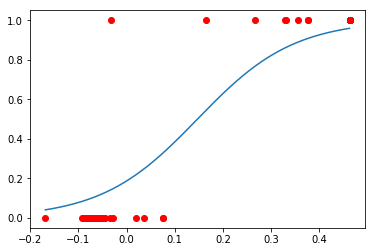

In [19]:
prob = df['0']
#prob = pd.DataFrame(logit.predict_proba(x_test_scaled))
fff = pd.DataFrame(logit.predict(x_test_scaled))
mini = float(df.min())
maxi = float(df.max())
mid = (mini + maxi)/2

def f(t):
    return 1/(1+np.exp(-10*(t - mid)))



plt.figure()
plt.plot(prob,fff,'ro')
#plt.plot([mid, mid], [0, 1], 'k--')
#plt.plot([mini, maxi],[0.5,0.5], 'k--')
ax = np.arange(mini,maxi,0.001)
axx = list(map(f,ax))
plt.plot(ax,axx)

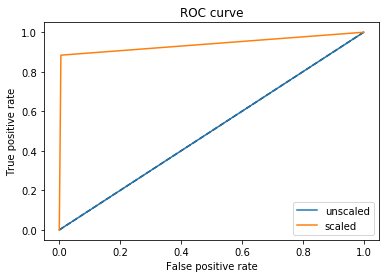

In [20]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_unsc, tpr_unsc, label='unscaled')
plt.plot(fpr_sc, tpr_sc, label='scaled')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()